# Assignment 2

Coursera Applied Plotting, Charting and Data Representation offered by University of Michigan.  
Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [4]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


In [2]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt


df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Data_Value'] = df['Data_Value']*0.1
df.Date=pd.to_datetime(df.Date)
df['Year']=df['Date'].dt.year
df['MthDay']=df['Date'].dt.strftime('%m-%d')
df=df[ df['MthDay'] != '02-29']

grouped_high=df.query('(Date.dt.year <= 2014) & (Date.dt.year >= 2005) ').query('Element=="TMAX"').groupby('MthDay').agg({'Data_Value':'max'})
grouped_low= df.query('(Date.dt.year <= 2014) & (Date.dt.year >= 2005) ').query('Element=="TMIN"').groupby('MthDay').agg({'Data_Value':'min'})
#merge 2005-2014 aggregate min-max information with all the data including 2015
df = pd.merge(df,grouped_high.reset_index().rename(columns={'Data_Value':'Max_temp'}), on='MthDay', how='left')
df = pd.merge(df,grouped_low.reset_index().rename(columns={'Data_Value':'Min_temp'}), on='MthDay', how='left')
#compare 2015 with aggregate data
breakpt_high = df[(df.Year==2015) & (df.Element=="TMAX") & (df.Data_Value > df.Max_temp)]
breakpt_low  = df[(df.Year==2015) & (df.Element=="TMIN") & (df.Data_Value < df.Min_temp)]



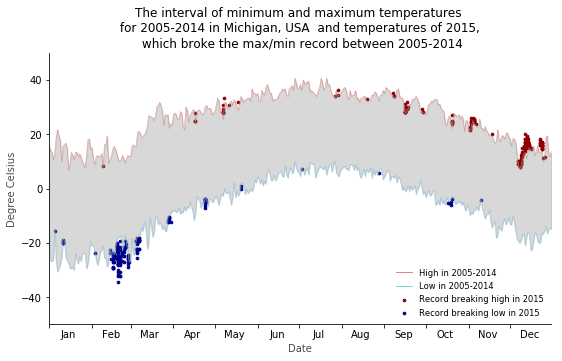

In [26]:
## PLOT ##
xvals= np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

fig=plt.figure(figsize=(9, 5))

#lineplot for data between 2005-2014
plt.plot(xvals, grouped_high['Data_Value'], color='lightcoral', linewidth= 0.4)
plt.plot(xvals, grouped_low['Data_Value'], color='skyblue', linewidth= 0.4)

#scatter plot for 2015 data
plt.scatter(breakpt_high.Date.values, breakpt_high.Data_Value.values, color='darkred', s=7)
plt.scatter(breakpt_low.Date.values, breakpt_low.Data_Value.values, color='darkblue', s=7)

## plot area formatting ##

ax=plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])

#filling
ax.fill_between(xvals, grouped_high['Data_Value'], grouped_low['Data_Value'], color='grey', alpha=0.3)

#format figure frame
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Date', fontsize=10, alpha=0.7)
plt.ylabel('Degree Celsius', fontsize=10, alpha=0.7)
plt.title('The interval of minimum and maximum temperatures \n for 2005-2014 in Michigan, USA  and temperatures of 2015, \n which broke the max/min record between 2005-2014', fontsize=12)
legends=plt.legend(['High in 2005-2014','Low in 2005-2014','Record breaking high in 2015','Record breaking low in 2015'],loc=0, fontsize='small', frameon=False)

#change thickness of legend lines:
for legobj in legends.legendHandles[0:2]:
    legobj.set_linewidth(1.0)
    
#plt.subplots_adjust(top=0.95)

# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15)) #put minor xtick between the middle of two majorticks

# What you put at the ticks:
ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter()) #put nothing on majorticks
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b')) #put months on the minor ticks

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0) # Make small ticker disappear
    tick.label1.set_horizontalalignment('center') #center the xtick labels

ax.xaxis.grid(True)   
#plt.savefig('assignment2plot.png', bbox_inches='tight')

In [31]:
def listdata(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

diap_date=[result.strftime('%b %d') for result in listdata(date(2015, 1, 1), date(2016, 1, 1), timedelta(days=1))]
dfLines, dfScat=make_plotting_DF()
diap_date

['Jan 01',
 'Jan 02',
 'Jan 03',
 'Jan 04',
 'Jan 05',
 'Jan 06',
 'Jan 07',
 'Jan 08',
 'Jan 09',
 'Jan 10',
 'Jan 11',
 'Jan 12',
 'Jan 13',
 'Jan 14',
 'Jan 15',
 'Jan 16',
 'Jan 17',
 'Jan 18',
 'Jan 19',
 'Jan 20',
 'Jan 21',
 'Jan 22',
 'Jan 23',
 'Jan 24',
 'Jan 25',
 'Jan 26',
 'Jan 27',
 'Jan 28',
 'Jan 29',
 'Jan 30',
 'Jan 31',
 'Feb 01',
 'Feb 02',
 'Feb 03',
 'Feb 04',
 'Feb 05',
 'Feb 06',
 'Feb 07',
 'Feb 08',
 'Feb 09',
 'Feb 10',
 'Feb 11',
 'Feb 12',
 'Feb 13',
 'Feb 14',
 'Feb 15',
 'Feb 16',
 'Feb 17',
 'Feb 18',
 'Feb 19',
 'Feb 20',
 'Feb 21',
 'Feb 22',
 'Feb 23',
 'Feb 24',
 'Feb 25',
 'Feb 26',
 'Feb 27',
 'Feb 28',
 'Mar 01',
 'Mar 02',
 'Mar 03',
 'Mar 04',
 'Mar 05',
 'Mar 06',
 'Mar 07',
 'Mar 08',
 'Mar 09',
 'Mar 10',
 'Mar 11',
 'Mar 12',
 'Mar 13',
 'Mar 14',
 'Mar 15',
 'Mar 16',
 'Mar 17',
 'Mar 18',
 'Mar 19',
 'Mar 20',
 'Mar 21',
 'Mar 22',
 'Mar 23',
 'Mar 24',
 'Mar 25',
 'Mar 26',
 'Mar 27',
 'Mar 28',
 'Mar 29',
 'Mar 30',
 'Mar 31',
 'Apr 01',